**References**    
https://discourse.holoviz.org/t/how-to-show-hide-overlay-depending-on-zoom-level/61/2  
**Operation**  
http://holoviews.org/user_guide/Transforming_Elements.html  
**Param**  
https://param.holoviz.org/Reference_Manual/param.html  
**Responding to events . Colormap Interactive **  
https://holoviews.org/user_guide/Responding_to_Events.html  
**Annotation of Data**  
https://holoviews.org/user_guide/Annotating_Data.html  


In [1]:
import obspy
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
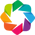

In [2]:
from display_utils import *

In [3]:
gdata=np.load("gain_data_f64.npy",allow_pickle=True)
times=[t for t in range(0,gdata.shape[0])]
channels=[c for c in range(0,648)]


xarr_gdata=xr.Dataset(
        {
            'amplitudes':(('channels','time'),gdata.T)
        },
        {
            "channels":channels,"time":times
        }
    )

In [4]:
xarr_gdata

<xarray.Dataset>
Dimensions:     (channels: 648, time: 5601)
Coordinates:
  * channels    (channels) int64 0 1 2 3 4 5 6 7 ... 641 642 643 644 645 646 647
  * time        (time) int64 0 1 2 3 4 5 6 ... 5595 5596 5597 5598 5599 5600
Data variables:
    amplitudes  (channels, time) float64 0.0 0.1202 ... -8.778e+04 -8.832e+04

In [5]:
gain_hv_ds=hv.Dataset(xarr_gdata)
gain_hv_image=hv.Image(gain_hv_ds)

In [6]:
#Event capturing
#http://holoviews.org/user_guide/Custom_Interactivity.html

In [7]:
from holoviews import streams

In [8]:
from scipy.interpolate import RectBivariateSpline

In [9]:
OUTPUT_HEIGHT=800
OUTPUT_WIDTH=800

In [10]:
type(xarr_gdata.channels)

xarray.core.dataarray.DataArray

In [11]:
from holoviews.operation import Operation
import param
#https://param.holoviz.org/Reference_Manual/param.html
class image_interpolate(hv.Operation):
    
    
    
    
   
    chan_min_ = param.Integer()
    chan_max_ = param.Integer()
    time_min_ = param.Integer()
    time_max_ = param.Integer()
    window_width_=param.Integer()
    window_height_=param.Integer()
    max_val_time_=param.Integer()
    max_val_chan_=param.Integer()
    
    def _process(self,element,key=None):
        
        
        
        ###### Interpolation START #####
       
        chan_min=self.p.chan_min_
        chan_max=self.p.chan_max_
        
        if chan_min<0 or chan_max < 0:
            return element
        no_channels=abs(chan_max-chan_min)+1
        channels=np.linspace(chan_min,chan_max,no_channels)

        time_min=self.p.time_min_
        time_max=self.p.time_max_
        
        if time_min < 0 or time_max < 0:
            return element
        no_samples=abs(time_max-time_min)+1
        times= np.linspace(time_min,time_max,no_samples)
        
        data=element.dimension_values(2,flat=False)
        
        data=data[self.p.time_min_:self.p.time_max_+1, self.p.chan_min_:self.p.chan_max_+1]
        data=data.T
        print(data.shape,channels.shape,times.shape)#,self.p.window_width_,self.p.window_height_)
        
        
        #bbox=[0,max(channels.shape[0],self.p.window_width_),0,max(times.shape[0],self.p.window_height_)]
        bbox=[0,self.p.max_val_chan_,0,self.p.max_val_time_] 
        rectBiVarF=RectBivariateSpline(x=channels,y=times,z=data,bbox=bbox)
        
        
        
        output_channels=np.linspace(self.p.chan_min_,self.p.chan_max_,self.p.window_width_)
        output_time=np.linspace(self.p.time_min_,self.p.time_max_,self.p.window_height_)
        new_data=rectBiVarF(output_channels,output_time)

       
        print(new_data.shape)
        ###### INTERPOLATION END  ######
        
        
        xrimg=xr.Dataset()
        xrimg['amplitudes']=(('channels','time'),new_data)
        xrimg.coords['channels']=output_channels
        xrimg.coords['time']=output_time

        hvsrimg=hv.Dataset(xrimg)
        element=hv.Image(hvsrimg)
        
        
        
        return element#,xrimg,data.T   #uncomment for test. comment for dynamic zoom



**The following cell is for Test of the above class**

In [12]:
# elem,xrrn,dd=image_interpolate(gain_hv_image,
       
#                            chan_min_=cmin,
#                            chan_max_=cmax,
#                            time_min_=tmin,
#                            time_max_=tmax,
#                            window_width_=OUTPUT_WIDTH,
#                            window_height_=OUTPUT_HEIGHT,
#                            max_val_time_=5600,
#                            max_val_chan_=648 
#                         )

In [13]:
gain_hv_image.data.time.shape

(5601,)

In [260]:
from holoviews.streams import Params

class Style(param.Parameterized):

    cmap = param.ObjectSelector(default=hv.Palette.colormaps["grayscale"], objects=[hv.Palette.colormaps[v] for v in hv.Palette.colormaps.keys()])
    #alpha= param.Integer(default=50)
    #clims= param.NumericTuple(None,length=2)
style = Style()

stream = Params(style)

#image.apply.opts(streams=[stream],colorbar=True, width=400)

In [263]:

        
ranges_x=[] 
ranges_y=[]
choices=[-1,1]
dim_x=[]
dim_y=[]

def onRangeXY(img, x_range, y_range):
    if x_range is None or y_range is None:
        return img
#     ranges_x.append(x_range)
#     ranges_y.append(y_range)
    dim_x.append(img.dimension_values(0,expanded=False).shape[0])
    dim_y.append(img.dimension_values(1,expanded=False).shape[0])
    elem=image_interpolate(img,
                           
                           chan_min_=min(int(x_range[0]),int(x_range[1])),
                           chan_max_=max(int(x_range[0]),int(x_range[1])),
                           time_min_ = min(int(y_range[0]),int(y_range[1])),
                           time_max_=max(int(y_range[0]),int(y_range[1])),
                           window_width_=OUTPUT_WIDTH,
                           window_height_=OUTPUT_HEIGHT,
                           max_val_time_=img.dimension_values(1,expanded=False).shape[0],
                           max_val_chan_=img.dimension_values(0,expanded=False).shape[0]
                          )
    return elem
    
rangexy_stream=hv.streams.RangeXY(source=gain_hv_image)
range_xy=[rangexy_stream]

filtered_rxy=gain_hv_image.apply(onRangeXY,streams=range_xy)



def colorf(clrmap):
    return hv.VLine(clr)

ColorStream=Stream.define('colorStream',clr=100)
cstreamobj=ColorStream()
range_xy.append(stream)
shade=datashade(filtered_rxy,#cmap=hv.Palette.colormaps["grayscale"],
                streams=range_xy,
                precompute=True)
shade=shade.opts(opts.RGB(invert_yaxis=True,width=OUTPUT_WIDTH,height=OUTPUT_HEIGHT))
###
#https://datashader.org/FAQ.html
###


In [264]:
shade

:DynamicMap   []
   :RGB   [channels,time]   (R,G,B,A)

In [265]:
style.cmap=hv.Palette.colormaps["Blues"]


Invoked as dynamic_operation(cmap=<function colormap_generator.<locals>.<lambda> at 0x7f63921fdae8>, alpha=50)
Invoked as dynamic_operation(cmap=<function colormap_generator.<locals>.<lambda> at 0x7f63921fdae8>, alpha=50)
Invoked as dynamic_operation(x_range=(11.371760769548635, 37.52584208290506), y_range=(1908.7396565012996, 1998.0332953501727), cmap=<function colormap_generator.<locals>.<lambda> at 0x7f63921fdae8>, alpha=50)
Invoked as dynamic_operation(x_range=(11.371760769548635, 37.52584208290506), y_range=(1908.7396565012996, 1998.0332953501727), cmap=<function colormap_generator.<locals>.<lambda> at 0x7f63921fdae8>, alpha=50)


Traceback (most recent call last):
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/plotting/util.py", line 274, in get_plot_frame
    return map_obj[key]
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/core/spaces.py", line 1280, in __getitem__
    val = self._execute_callback(*tuple_key)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/core/spaces.py", line 1054, in _execute_callback
    retval = self.callback(*args, **kwargs)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/core/spaces.py", line 693, in __call__
    ret = self.callable(*args, **kwargs)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/util/__init__.py", line 985, in dynamic_operation
    key, obj = resolve(key, kwargs)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/util/__init__.py", line 978, in resolve
    return key, map_obj[key]
  File "/anacond

In [252]:
hv.RGB?

In [243]:
style.alpha=50

In [250]:
style.clims=(-3,3)

Invoked as dynamic_operation(cmap=<function grayscale at 0x7f6394ae00d0>, alpha=50, clims=(-3, 3))
Invoked as dynamic_operation(cmap=<function grayscale at 0x7f6394ae00d0>, alpha=50, clims=(-3, 3))


Traceback (most recent call last):
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/plotting/util.py", line 274, in get_plot_frame
    return map_obj[key]
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/core/spaces.py", line 1280, in __getitem__
    val = self._execute_callback(*tuple_key)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/core/spaces.py", line 1054, in _execute_callback
    retval = self.callback(*args, **kwargs)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/core/spaces.py", line 693, in __call__
    ret = self.callable(*args, **kwargs)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/util/__init__.py", line 985, in dynamic_operation
    key, obj = resolve(key, kwargs)
  File "/anaconda/envs/data_processing/lib/python3.6/site-packages/holoviews/util/__init__.py", line 978, in resolve
    return key, map_obj[key]
  File "/anacond

In [93]:
print(filtered_rxy)
print(shade)

:DynamicMap   []
   :Image   [channels,time]   (amplitudes)
:DynamicMap   []
   :RGB   [channels,time]   (R,G,B,A)


In [ ]:
shade.opts(opts.)

In [106]:
shade.cmap='magma'

In [109]:
hv.Palette.colormaps.keys()

dict_keys(['grayscale', 'YlGn', 'YlGnBu', 'GnBu', 'BuGn', 'PuBuGn', 'PuBu', 'BuPu', 'RdPu', 'PuRd', 'OrRd', 'YlOrRd', 'YlOrBr', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'Greys', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdBu', 'RdGy', 'RdYlBu', 'Spectral', 'RdYlGn', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'Category10', 'Category20', 'Category20b', 'Category20c', 'Colorblind', 'Magma', 'Inferno', 'Plasma', 'Viridis', 'Cividis', 'Turbo'])

In [257]:
hv.Palette.colormaps["Blues"]

<function holoviews.plotting.bokeh.colormap_generator.<locals>.<lambda>(value)>

In [118]:
shade.group

'DynamicMap'

In [112]:
shade.cmap=hv.Palette.colormaps["Reds"]

In [130]:
from holoviews.streams import Params

class Style(param.Parameterized):

    cmap = param.ObjectSelector(default='viridis', objects=['viridis', 'plasma', 'magma'])

    color_levels = param.Integer(default=255, bounds=(1, 255))

style = Style()

stream = Params(style)

# image.apply.opts(streams=[stream]).opts(colorbar=True, width=400)
#filtered_rxy.apply.opts(streams=[stream]).opts(colorbar=True, width=400)
#shade.apply.opts((streams=[stream])).opts(colorbar=True, width=400)

In [69]:
shade.Parameters?

Object `shade.Parameters` not found.


In [60]:
cstreamobj.event(clr=100)

In [62]:
style.param.cmap='plasma'

In [35]:
filtered_rxy.event()
#filtered_rxy.opts.get?

In [59]:
gain_hv_imagein_hv_image.apply?

In [28]:
type(filtered_rxy)

holoviews.core.spaces.DynamicMap

In [37]:
list(hv.Palette.colormaps.keys())

['grayscale',
 'YlGn',
 'YlGnBu',
 'GnBu',
 'BuGn',
 'PuBuGn',
 'PuBu',
 'BuPu',
 'RdPu',
 'PuRd',
 'OrRd',
 'YlOrRd',
 'YlOrBr',
 'Purples',
 'Blues',
 'Greens',
 'Oranges',
 'Reds',
 'Greys',
 'PuOr',
 'BrBG',
 'PRGn',
 'PiYG',
 'RdBu',
 'RdGy',
 'RdYlBu',
 'Spectral',
 'RdYlGn',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'Category10',
 'Category20',
 'Category20b',
 'Category20c',
 'Colorblind',
 'Magma',
 'Inferno',
 'Plasma',
 'Viridis',
 'Cividis',
 'Turbo']

In [36]:

opts.defaults(
    opts.Area(fill_color='cornsilk', line_width=2,
              line_color='black'),
    opts.Ellipse(bgcolor='white', color='black'),
    opts.HLine(color='red', line_width=2),
    opts.Image(cmap='viridis'),
    opts.Path(bgcolor='white', color='black', line_dash='dashdot',
              show_grid=False),
    opts.VLine(color='red', line_width=2))

In [37]:
lin = np.linspace(-np.pi,np.pi,300)

def lissajous(t, a=3, b=5, delta=np.pi/2.):
    return (np.sin(a * t + delta), np.sin(b * t))

def lissajous_crosshair(t, a=3, b=5, delta=np.pi/2):
    (x,y) = lissajous(t,a,b,delta)
    return hv.VLine(x) * hv.HLine(y)

crosshair = hv.DynamicMap(lissajous_crosshair, kdims='t').redim.range(t=(-3.,3.))

path = hv.Path(lissajous(lin))

path * crosshair

:DynamicMap   [t]
   :Overlay
      .Path.I  :Path   [x,y]
      .VLine.I :VLine   [x,y]
      .HLine.I :HLine   [x,y]

In [38]:
from holoviews.streams import Stream, param

In [39]:
Time = Stream.define('Time', t=0.0)
Time = Stream.define('Time', t=param.Number(default=0.0, doc='A time parameter'))
hv.help(Time)
time_dflt = Time()
print('This Time instance has parameter t={t}'.format(t=time_dflt.t))
time = Time(t=np.pi/4)
dmap = hv.DynamicMap(lissajous_crosshair, streams=[time])
path * dmap + path * lissajous_crosshair(t=np.pi/4.)

Parameters of 'Time'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

NameValue  Type   Mode 

t   0.0  Number  V RW 

Parameter docstrings:

t: A time parameter
This Time instance has parameter t=0.0


:Layout
   .DynamicMap.I :DynamicMap   []
      :Overlay
         .Path.I  :Path   [x,y]
         .VLine.I :VLine   [x,y]
         .HLine.I :HLine   [x,y]
   .Overlay.I    :Overlay
      .Path.I  :Path   [x,y]
      .VLine.I :VLine   [x,y]
      .HLine.I :HLine   [x,y]

In [40]:
time.event(t=-0.4)

In [41]:
dmap.event(t=0.5)

In [43]:
ls = np.linspace(0, 10, 200)
xx, yy = np.meshgrid(ls, ls)

XY = Stream.define('XY',x=0.0,y=0.0)

def marker(x,y):
    return hv.VLine(x) * hv.HLine(y)

image = hv.Image(np.sin(xx)*np.cos(yy))

dmap = hv.DynamicMap(marker, streams=[XY()])

image * dmap

:DynamicMap   []
   :Overlay
      .Image.I :Image   [x,y]   (z)
      .VLine.I :VLine   [x,y]
      .HLine.I :HLine   [x,y]

In [97]:
style.color_levels = 100
style.cmap = 'magma'

In [135]:
isinstance(stream,Stream)

True